In [30]:
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
df = pd.read_csv("data/Airline.csv")

In [34]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


### Feature Encoding

In [37]:
# Encode the target variable ('satisfaction') to numeric (e.g., 'satisfied' → 1, 'dissatisfied' → 0)
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

# Identify categorical columns to be encoded
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Encode categorical columns using basic label encoding (no preprocessing )
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

### Feature Scaling (bw 0 and 1)

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Select all features except the target variable 'satisfaction'
features = df.drop(columns=['satisfaction'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features to scale them between 0 and 1
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame with original column names
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target variable back to the DataFrame
scaled_df['satisfaction'] = df['satisfaction'].values

df=scaled_df

# Display the scaled DataFrame
print(scaled_df.head()) 

   Gender  Customer Type       Age  Type of Travel  Class  Flight Distance  \
0     0.0            0.0  0.743590             1.0    0.5         0.031155   
1     1.0            0.0  0.512821             1.0    0.0         0.349804   
2     0.0            0.0  0.102564             1.0    0.5         0.302565   
3     0.0            0.0  0.679487             1.0    0.5         0.083031   
4     0.0            0.0  0.807692             1.0    0.5         0.044052   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0           0.0                                0.0             0.0   
1           0.0                                0.0             0.0   
2           0.0                                0.0             0.0   
3           0.0                                0.0             0.0   
4           0.0                                0.0             0.0   

   Gate location  ...  Ease of Online booking  On-board service  \
0            0.4  ...                     0

### Splitting in 80 , 20 ratio , training with all features

In [49]:
df = df.dropna(subset=['Arrival Delay in Minutes'])

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features (X) and target (y)
X = df.drop(columns=['satisfaction'])  # Use all 21 features
y = df['satisfaction']                # Target variable

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression (without preprocessing): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy of Logistic Regression (without preprocessing): 0.8332

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82     11721
           1       0.85      0.85      0.85     14177

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898



### Using RFE for feature elimination

In [79]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Initialize Model and RFE
model = LogisticRegression(max_iter=1000)
k = 20 # Select top k features
print("Optimal Number of Features:", rfecv.n_features_)

rfecv = RFECV(LogisticRegression(max_iter=1000), cv=5)
rfecv.fit(X_train, y_train)

# Step 3: Transform Training and Test Sets
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Step 4: Train Model on Selected Features
model.fit(X_train_selected, y_train)

# Step 5: Predict on Test Set
y_pred = model.predict(X_test_selected)

# Step 6: Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after Feature Elimination: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Optimal Number of Features: 22
Accuracy after Feature Elimination: 0.8333

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82     11721
           1       0.85      0.85      0.85     14177

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898



### Select k best , selects 3 imp feature and accuracy is appro 80%

In [83]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Step 3: Apply SelectKBest
k = 2  # Select top k features
selector = SelectKBest(score_func=f_classif, k=k)  # Use ANOVA F-test (For classification)
# selector = SelectKBest(score_func=chi2, k=k)     # Use chi-square (For non-negative values)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Step 4: Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_selected, y_train)

# Step 5: Make Predictions and Evaluate
y_pred = model.predict(X_test_selected)

# Step 6: Performance Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy After SelectKBest: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: View Selected Features
print("Selected Features Mask:", selector.get_support())
print("Feature Scores:", selector.scores_)

Accuracy After SelectKBest: 0.7916

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77     11721
           1       0.80      0.82      0.81     14177

    accuracy                           0.79     25898
   macro avg       0.79      0.79      0.79     25898
weighted avg       0.79      0.79      0.79     25898

Selected Features Mask: [False False False False False False False False False False False  True
 False  True False False False False False False False False]
Feature Scores: [4.82668963e+03 9.73835135e+03 1.48144174e+03 1.22749200e+03
 8.67430728e+03 1.55658029e+02 6.57579883e+03 2.43313390e+01
 1.52301782e+03 1.10920599e+01 5.66819704e+03 3.93067623e+04
 1.86677086e+04 2.37540791e+04 1.47064596e+04 1.05927347e+04
 7.62523768e+03 7.86952537e+03 7.48508800e+03 1.33586908e+04
 6.03174741e+02 7.17309693e+02]


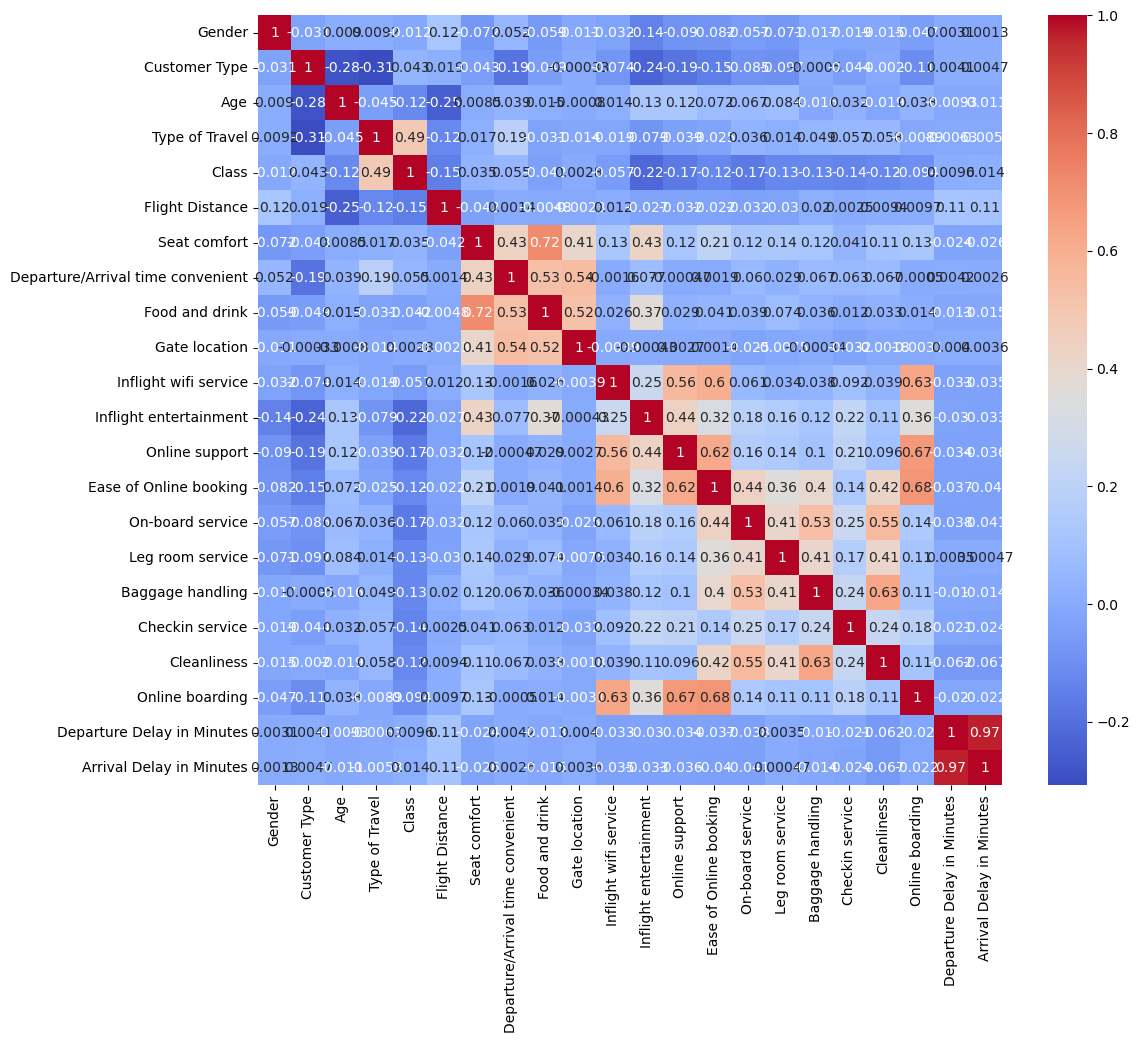

Highly Correlated Features to Remove: {'Arrival Delay in Minutes'}


In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = X.corr()

# Plotting the heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

# Identify highly correlated features (Threshold > 0.85)
threshold = 0.85
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("Highly Correlated Features to Remove:", correlated_features)

# Drop highly correlated features
X_corr_filtered = X.drop(columns=correlated_features)

X_train, X_test, y_train, y_test = train_test_split(X_corr_filtered, y, test_size=0.2, random_state=42, stratify=y)

In [94]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy After SelectKBest: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy After SelectKBest: 0.8330

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82     11721
           1       0.85      0.85      0.85     14177

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898

